In [2]:
from operator import add
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.stats import LombScargle
#from gatspy.periodic import LombScargleFast
from functools import partial
from gatspy import periodic
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from multiprocessing import Pool
import numpy as np
import os
#from sqlite3 import *
import random
from random import shuffle
from random import randint

In [3]:
#conn = connect('minion_1016_sqlite.db')
#conn = connect('astro_lsst_01_1004_sqlite.db')
#conn = connect('minion_1020_sqlite.db')

In [4]:
# LSST zero points  u,g,r,i,z,y
zeroPoints = [0,26.5,28.3,28.13,27.79,27.4,26.58]
FWHMeff = [0.8,0.92,0.87,0.83,0.80,0.78,0.76] # arcmins?
pixelScale = 0.2
readOut = 12.7
sigSys = 0.005
flareperiod = 4096
flarecycles = 10
dayinsec=86400
background = 40
# sat mag u,g,r,i,z,y=14.7,15.7,15.8,15.8,15.3 and 13.9
# start date 59580.033829 end date + 10 years
#maglist=[20]*7

In [5]:
looooops = 50
maglength = 7
freqlength = 7
processors = 7

In [6]:
obs = [[59616.299504000002, 59616.373899999999, 59617.377407, 59618.304701000001, 59618.320704999998, 59618.327817999998, 59618.367501000001, 59618.372427000002, 59618.377794, 59618.385405000001, 59620.357216999997, 59620.363462000001, 59620.379584000002, 59620.389000000003, 59621.297327, 59621.305326000002, 59621.314226000002, 59622.312717000001, 59622.366688000002, 59630.275236000001, 59630.286805999996, 59630.303731, 59641.311065000002, 59641.312855999997, 59645.235432000001, 59645.250542000002, 59645.257657000002, 59652.303389000001, 59652.304282999998, 59653.269506999997, 59653.275774000002, 59654.265184999997, 59656.269638999998, 59656.276618000004, 59657.197829999997, 59657.205827999998, 59657.215175999998, 59657.263699000003, 59665.315978999999, 59665.317778999997, 59665.331387999999, 59665.338168000002, 59665.340858000003, 59665.347642000001, 59666.409095000003, 59666.410887999999, 59670.201271999998, 59670.207947000003, 59670.212396000003, 59674.227401999997, 59674.235911999996, 59674.236807000001, 59676.152357999999, 59676.160802999999, 59676.175913999999, 59678.188327000003, 59679.188063000001, 59680.131445999999, 59680.133674999997, 59680.139883000003, 59680.150558000001, 59680.171031999998, 59680.178599999999, 59682.108, 59682.115618999997, 59688.361971999999, 59688.381748, 59693.083102999997, 59693.095993000003, 59693.104443999997, 59695.111334000001, 59695.115773999998, 59695.153166999997, 59695.159857999999, 59695.168356000002, 59695.172381999997, 59696.068472999999, 59696.091596999999, 59696.097387000002, 59696.106288000003, 59696.136084999998, 59697.093621, 59697.098956000002, 59697.106963999999, 59697.122542999998, 59697.130999000001, 59698.07746, 59698.085009000002, 59698.100560999999, 59698.152201999997, 59700.108522000002, 59700.134785000002, 59700.136573999996, 59701.081133, 59701.089132000001, 59702.061070000003, 59702.065957999999, 59702.083315999997, 59703.062193999998, 59703.079078000002, 59703.136494999999, 59703.157184000003, 59703.164822999999, 59704.095727, 59704.168875000003, 59705.400307000004, 59718.252451, 59718.275501999997, 59718.279098999999, 59718.324256, 59720.039016000002, 59720.131756000002, 59722.020894000001, 59722.038672000002, 59724.016089999997, 59724.026761000001, 59724.114585000003, 59725.013185000003, 59725.021194000001, 59725.029653999998, 59725.034094000002, 59725.041222, 59725.994381999997, 59725.998256999999, 59727.988340000004, 59728.030495999999, 59728.033172000003, 59728.989365000001, 59729.002269999997, 59729.009832000003, 59729.010720999999, 59748.116349999997, 59750.009051000001, 59750.016649999998, 59750.01844, 59750.133191000001, 59750.138593999996, 59750.151811999996, 59750.189723000003, 59750.196898000002, 59750.255781, 59751.009136000001, 59752.999348999998, 59757.169065000002, 59757.172694000001, 59757.180769999999, 59757.194269, 59757.991382, 59758.000322, 59758.002114000003, 59758.007490000004, 59758.011968999999, 59758.016893, 59758.982513000003, 59761.330683, 59761.337788999997, 59761.348432999999, 59762.982685000003, 59762.998347000001, 59763.044794000001, 59777.060711999999, 59777.091758000002, 59777.097652999997, 59777.14069, 59781.102318999998, 59781.108595999998, 59781.110858, 59781.115806000002, 59781.181435999999, 59781.191747999997, 59781.224978999999, 59784.020849, 59784.196575000002, 59784.226672999997, 59785.116557000001, 59786.007049, 59786.015151, 59786.028699000002, 59786.043646999999, 59786.209666000002], [59641.311065000002, 59641.312855999997, 59645.235432000001, 59645.250542000002, 59645.257657000002, 59670.201271999998, 59670.207947000003, 59670.212396000003, 59697.093621, 59697.098956000002, 59697.106963999999, 59697.122542999998, 59697.130999000001, 59700.108522000002, 59700.134785000002, 59700.136573999996, 59702.061070000003, 59702.065957999999, 59702.083315999997, 59703.062193999998, 59703.079078000002, 59703.136494999999, 59703.157184000003, 59703.164822999999, 59728.030495999999, 59728.033172000003, 59762.982685000003, 59762.998347000001, 59763.044794000001, 59785.116557000001], [59665.315978999999, 59665.317778999997, 59665.331387999999, 59665.338168000002, 59665.340858000003, 59665.347642000001, 59751.009136000001, 59752.999348999998, 59757.991382, 59758.000322, 59758.002114000003, 59758.007490000004, 59758.011968999999, 59758.016893, 59758.982513000003, 59761.330683, 59761.337788999997, 59761.348432999999, 59781.102318999998, 59781.108595999998, 59781.110858, 59781.115806000002, 59781.181435999999, 59781.191747999997, 59781.224978999999, 59786.007049, 59786.015151, 59786.028699000002, 59786.043646999999, 59786.209666000002], [59695.111334000001, 59695.115773999998, 59695.153166999997, 59695.159857999999, 59695.168356000002, 59695.172381999997, 59701.081133, 59701.089132000001, 59720.039016000002, 59720.131756000002, 59750.009051000001, 59750.016649999998, 59750.01844, 59750.133191000001, 59750.138593999996, 59750.151811999996, 59750.189723000003, 59750.196898000002, 59750.255781, 59757.169065000002, 59757.172694000001, 59757.180769999999, 59757.194269, 59777.060711999999, 59777.091758000002, 59777.097652999997, 59777.14069, 59784.020849, 59784.196575000002, 59784.226672999997], [59616.299504000002, 59674.227401999997, 59674.235911999996, 59674.236807000001, 59676.152357999999, 59676.160802999999, 59676.175913999999, 59680.131445999999, 59680.133674999997, 59680.139883000003, 59680.150558000001, 59680.171031999998, 59680.178599999999, 59693.083102999997, 59693.095993000003, 59693.104443999997, 59696.068472999999, 59696.091596999999, 59696.097387000002, 59696.106288000003, 59696.136084999998, 59698.07746, 59698.085009000002, 59698.100560999999, 59698.152201999997, 59728.989365000001, 59729.002269999997, 59729.009832000003, 59729.010720999999, 59748.116349999997], [59656.269638999998, 59656.276618000004, 59657.197829999997, 59657.205827999998, 59657.215175999998, 59657.263699000003, 59678.188327000003, 59679.188063000001, 59688.361971999999, 59688.381748, 59704.095727, 59704.168875000003, 59705.400307000004, 59718.252451, 59718.275501999997, 59718.279098999999, 59718.324256, 59722.020894000001, 59722.038672000002, 59724.016089999997, 59724.026761000001, 59724.114585000003, 59725.013185000003, 59725.021194000001, 59725.029653999998, 59725.034094000002, 59725.041222, 59725.994381999997, 59725.998256999999, 59727.988340000004], [59616.373899999999, 59617.377407, 59618.304701000001, 59618.320704999998, 59618.327817999998, 59618.367501000001, 59618.372427000002, 59618.377794, 59618.385405000001, 59620.357216999997, 59620.363462000001, 59620.379584000002, 59620.389000000003, 59621.297327, 59621.305326000002, 59621.314226000002, 59622.312717000001, 59622.366688000002, 59630.275236000001, 59630.286805999996, 59630.303731, 59652.303389000001, 59652.304282999998, 59653.269506999997, 59653.275774000002, 59654.265184999997, 59666.409095000003, 59666.410887999999, 59682.108, 59682.115618999997]]

In [7]:
len(obs[5])

30

In [8]:
def magUncertainy(Filter, objectmag, exposuretime,background, FWHM): # b is background counts per pixel   
    countsPS = 10**((Filter-objectmag)/2.5)
    counts = countsPS * exposuretime
    uncertainty = 1/(counts/((counts/2.3)+(((background/2.3)+(12.7**2))*2.266*((FWHM/0.2)**2)))**0.5) # gain assumed to be 1
    return uncertainty
#from lsst should have got the website! https://smtn-002.lsst.io/

In [9]:
def averageFlux(observations, Frequency, exptime):
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    return c

def Flux(observations,Frequency,exptime):
    a = [np.sin((2*np.pi*(Frequency)*x)) for x in observations]
    return a

In [10]:
def ellipsoidalFlux(observations, Frequency,exptime):
    period = 1/(Frequency)
    phase = [(x % (2*period)) for x in observations]
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    
    for x in range(0,len(phase)):
        if (phase[x]+(1.5*period)) < (3*period):
            c[x] = c[x]*(1./3.)
        else:
            c[x] = c[x]*(2./3.)
    return c
## this is doing something but not the right something, come back to it 

In [11]:
def flaring(B, length, dayinsec=86400,amplitude=1):   
    global flareMag, minutes
    fouriers = np.linspace(0.00001,0.05,(dayinsec/30))
    logF = [np.log(x) for x in fouriers] # start at 30 go to a day in 30 sec increments
    real = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers] #random.gauss(mu,sigma) to change for values from zurita
    # imaginary = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers]
    IFT = np.fft.ifft(real)
    seconds = np.linspace(0,dayinsec, (dayinsec/30)) # the day in 30 sec increments
    minutes = [x for x in seconds]
    minimum = (np.max(-IFT))
    positive = [x + minimum for x in IFT] # what did this even achieve? it helped with normalisation!
    normalised = [x/(np.mean(positive)) for x in positive] # find normalisation
    normalisedmin = minimum/(np.mean(positive))
    normalised = [x - normalisedmin for x in normalised]
    flareMag = [amplitude * x for x in normalised] # normalise to amplitude
    logmins = [np.log(d) for d in minutes] # for plotting?
#     plt.plot(minutes,flareMag)
#     plt.title('lightcurve')
#     plt.show()
    return flareMag

In [20]:
def lombScargle(frequencyRange,objectmag=20,loopNo=looooops,df=0.001,fmin=0.001,numsteps=100000,modulationAmplitude=0.1,Nquist=200): # frequency range and object mag in list
    #global totperiod, totmperiod, totpower, date, amplitude, frequency, periods, LSperiod, power, mag, error, SigLevel
    results = {}
    totperiod = []
    totmperiod = []
    totpower = [] # reset
    SigLevel = []
    filterletter = ['o','u','g','r','i','z','y']
    
    period = 1/(frequencyRange)
    if period > 0.5:
        numsteps = 10000
    elif period > 0.01:
        numsteps = 100000
    else:
        numsteps = 200000
    freqs = fmin + df * np.arange(numsteps) # for manuel
    allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy = [], [], [], [], [], [], [] #reset
    measuredpower = [] # reset
    y = [allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy] # for looping only
    for z in range(1, len(y)):
        #y[z] = averageFlux(obs[z], frequencyRange[frange], 30)  # amplitde calculation for observations, anf frequency range
        y[z] = ellipsoidalFlux(obs[z], frequencyRange,30)
        y[z] = [modulationAmplitude * t for t in y[z]] # scaling
        for G in range(0, len(y[z])):
            flareMinute = int(round((obs[z][G]*24*60*2)%((dayinsec/(30*2))*flarecycles)))
            y[z][G] = y[z][G] + longflare[flareMinute] # add flares swapped to second but not changing the name intrtoduces fewer bugs
    date = []
    amplitude = []
    mag = []
    error = []
    filts = []
    for z in range(1, len(y)):
        #date.extend([x for x in obs[z]])
        date.extend(obs[z])
        amplitude = [t + random.gauss(0,magUncertainy(zeroPoints[z],objectmag,30,background,FWHMeff[z])) for t in y[z]] # scale amplitude and add poisson noise
        mag.extend([objectmag - t for t in amplitude]) # add actual mag
        error.extend([sigSys + magUncertainy(zeroPoints[z],objectmag,30,background,FWHMeff[z])+0.2]*len(amplitude))
        filts.extend([filterletter[z]]*len(amplitude))
        
#         phase = [(day % (period*2))/(period*2) for day in obs[z]]
#         pmag = [objectmag - t for t in amplitude]
#         plt.plot(phase, pmag, 'o', markersize=4)
#         plt.xlabel('Phase')
#         plt.ylabel('Magnitude')
#         plt.gca().invert_yaxis()
#         plt.title('R filter, Period = '+str(period))#+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)))
#         plt.show()

#     plt.plot(date, mag, 'o')
#     plt.xlim(lower,higher)
#     plt.xlabel('time (days)')
#     plt.ylabel('mag')
#     plt.gca().invert_yaxis()
#     plt.show()

    model = periodic.LombScargleMultibandFast(fit_period=False)
    model.fit(date, mag, error, filts)
    power = model.score_frequency_grid(fmin, df, numsteps) 

    if period > 10.:
        model.optimizer.period_range=(10, 110)
    elif period > 0.51:
        model.optimizer.period_range=(0.5, 10)
    elif period > 0.011:
        model.optimizer.period_range=(0.01, 0.52)
    else:
        model.optimizer.period_range=(0.0029, 0.012)


    LSperiod = model.best_period
    if period < 10:
        higher = 10
    else:
        higher = 100
    fig, ax = plt.subplots()
    ax.plot(1./freqs, power,color='red')
    ax.set(xlim=(0, higher), ylim=(0, 1.2),
           xlabel='period (days)',
           ylabel='Lomb-Scargle Power',
          title='Period = '+str(period)+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)));
    #plt.show()


    phase = [(day % (period*2))/(period*2) for day in date]
    #idealphase = [(day % (period*2))/(period*2) for day in dayZ]
    #print(len(phase),len(idealphase))
    #plt.plot(idealphase,Zmag,'ko',)
#     plt.plot(phase, mag, 'o', markersize=4)
#     plt.xlabel('Phase')
#     plt.ylabel('Magnitude')
#     plt.gca().invert_yaxis()
#     plt.title('Period = '+str(period)+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)))
#     plt.show()
    #print(period, LSperiod, period*20)

#         print('actualperiod', period, 'measured period', np.mean(LSperiod),power.max())# 'power',np.mean(power[maxpos]))
#         print(frequencyRange[frange], 'z', z)

#     totperiod.append(period)
#     totmperiod.append(np.mean(LSperiod))
#     totpower.append(power.max())
    mpower = power.max()
    measuredpower.append(power.max()) # should this correspond to period power and not max power?
    maxpower = []           
    counter = 0.
    for loop in range(0,loopNo):
        random.shuffle(date)
        model = periodic.LombScargleMultibandFast(fit_period=False)
        model.fit(date, mag, error, filts)
        power = model.score_frequency_grid(fmin, df, numsteps)  
        maxpower.append(power.max())
        ax.plot(1./freqs, power,color='gray')
    plt.show()

    for X in range(0, len(maxpower)):
        if maxpower[X] > measuredpower[-1]:
            counter = counter + 1. 
    Significance = (1.-(counter/len(maxpower)))
    #print('sig', Significance, 'counter', counter)
    SigLevel.append(Significance)
    
    freqnumber = FrangeLoop.index(frequencyRange)
    magnumber = MagRange.index(objectmag)
    #print(fullmaglist)
    listnumber = (magnumber*maglength)+freqnumber
#     print(listnumber)
#     measuredperiodlist[listnumber] = LSperiod
#     periodlist[listnumber] = period
#     powerlist[listnumber] = mpower
#     siglist[listnumber] = Significance
#     fullmaglist[listnumber] = objectmag
# results order, 0=mag,1=period,2=measuredperiod,3=siglevel,4=power,5=listnumber
    results[0] = objectmag
    results[1] = period
    results[2] = LSperiod
    results[3] = Significance
    results[4] = mpower
    results[5] = listnumber
    
    return results

In [13]:
#findObservations([(630,)])
#remove25(obs)
#averageFlux(obs[0], 1, 30)
longflare = []
for floop in range(0,flarecycles):
    flareone = flaring(-1, flareperiod, amplitude=0.3)
    flareone = flareone[0:1440]
    positiveflare = [abs(x) for x in flareone]
    longflare.extend(positiveflare)
    


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [15]:
PrangeLoop = np.logspace(-2.5,2,freqlength)
FrangeLoop = [(1/x) for x in PrangeLoop]
File = open('minionresultsfile.txt','w')
File.write('fullPeriod = [\n'+
          'fullMag = [\n'+
          'fullmeasuredPeriod = [\n'+
          'fullPower = [\n'+
          'fullSigLevel = [\n'
          'lisnumber = [')
File.close() 

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "
/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "
/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle ins

Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  0.5 to 10
 - Computing periods at 1616 steps
Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  0.5 to 10
 - Computing periods at 1616 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  9.9 to 1.1e+02
Finding optimal frequency:
 - Estimated peak width = 0.037
 - Computing periods at 79 steps
 - Using 5 steps per peak; omega_step = 0.0074
Zooming-in on 5 candidate peaks:
 - User-specified period range:  9.9 to 1.1e+02
 - Computing periods at 995 steps
 - Computing periods at 79 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 

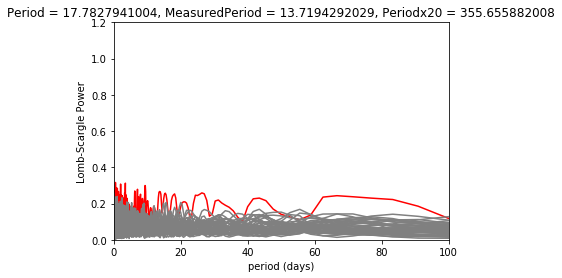

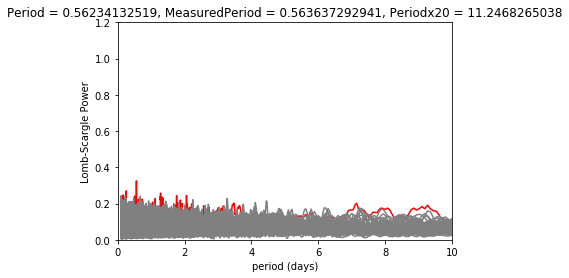

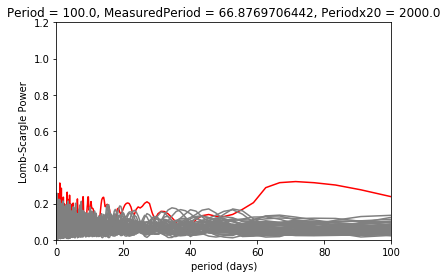

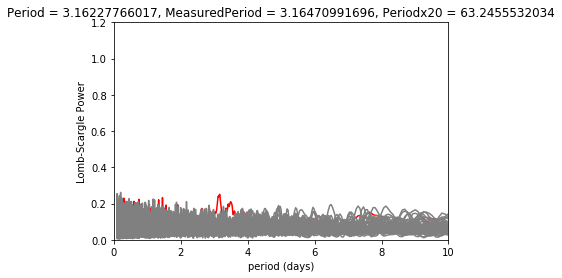

Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


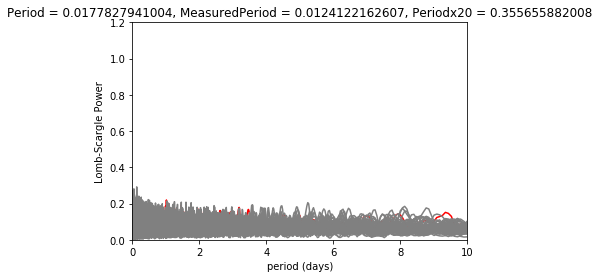

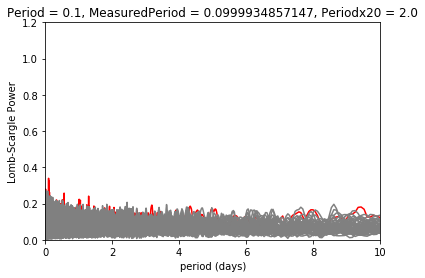

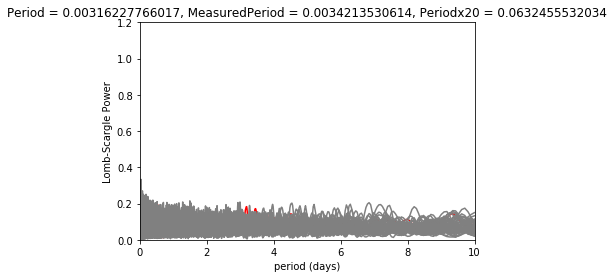

ValueError: I/O operation on closed file

In [21]:
results = []
fullmeasuredPeriod = []
fullPeriod = []
fullPower = []
fullSigLevel = []
fullMag = []
#maglist = [20]*7
MagRangearray = np.linspace(17,24,maglength)
MagRange = [x for x in MagRangearray]
pool = Pool(processors)
for h in range(0,len(MagRange)):
    maglist = [MagRange[h]]*7
    results.append(pool.map(partial(lombScargle, objectmag=MagRange[h]),FrangeLoop))
    f = open('minionresultsfile.txt','w+')
    with open('test.txt') as f:
        lines = f.readlines()
    
    for line in range(len(lines)):
        lines[line] = lines[line][:-1]+str(results[h][line])
    f.write('\n'.join(lines))
    f.close() 
    # change to new file for each instance and combine at the end

In [ ]:
periodlist = []
fullmaglist = []
measuredperiodlist = []
siglist = []
powerlist = []
listnumberlist = []

for x in range(len(results)):
    for y in range(len(results[x])):
        fullmaglist.append(results[x][y][0])
        periodlist.append(results[x][y][1])
        measuredperiodlist.append(results[x][y][2])
        siglist.append(results[x][y][3])
        powerlist.append(results[x][y][4])
        listnumberlist.append(results[x][y][5])
    
    

In [26]:
File = open('minionfullresultsFile.txt','w')
File.write('fullPeriod = '+str(periodlist)+'\n\n'+
          'fullMag = '+str(fullmaglist)+'\n\n'+
          'fullmeasuredPeriod = '+str(measuredperiodlist)+'\n\n'+
          'fullPower = '+str(powerlist)+'\n\n'+
          'fullSigLevel = '+str(siglist)+'\n\n'
          'lisnumber = '+str(listnumberlist))
File.close() 


In [25]:
arraylength = 20
perioddifference = [(x-y)/y for x,y in zip(fullmeasuredPeriod,fullPeriod)]
perioddifferenceArray = np.asarray(perioddifference)
perioddifference = perioddifferenceArray.reshape(-1,arraylength)
perioddifference = perioddifference.tolist()

In [24]:
twenty = [20*x for x in periodlist]

In [56]:
difference = [((x-y)/y)*100 for x,y in zip(periodlist,measuredperiodlist)]

In [57]:
difference
#print(periodlist[1]-measuredperiodlist[1])

[-5.0655481757455938,
 -0.49554254371440909,
 -0.00023243462813863161,
 -0.0002543932795871644,
 -2.8093468280764164,
 20.185889514203168,
 0.010112676926313983,
 130.42151403398407,
 724.30901733686574,
 0.0220475024548436,
 0.11202318094420428,
 -0.040256501729116233,
 79.787766982777427,
 380.10268257812828,
 438.31558637137175,
 -0.23345516324534049,
 1.4904394644302563,
 -2.5011395983646603,
 107.30123729508571,
 -0.73355139502271516]

In [52]:
divisor = [(x/y) for x,y in zip(periodlist,measuredperiodlist)]

In [53]:
print(divisor)

[0.94934451824254407, 0.99504457456285589, 0.99999767565371867, 0.99999745606720414, 0.9719065317192358, 1.2018588951420317, 1.0001011267692632, 2.3042151403398408, 8.2430901733686568, 1.0002204750245485, 1.0011202318094421, 0.99959743498270881, 1.7978776698277743, 4.8010268257812827, 5.3831558637137169, 0.99766544836754656, 1.0149043946443026, 0.97498860401635346, 2.0730123729508572, 0.99266448604977287]
